Олег Голещихин  
**Прикладная статистика**  
**ДОМАШНЕЕ ЗАДАНИЕ 4**  

**Упражнение 2.** В файле lifeline.xls содержатся 50 пар наблюдений из исследования докторов Л. Матера и М. Уилсона. В нем рассматривались следующие переменные: X - длина "линии жизни" на левой руке в сантиметрах (с точностью до 0.15 см) и Y - продолжительность жизни человека (округленная до ближайшего целого года). Изучите корреляцию X и Y. Верно ли, что X и Y связаны линейной регрессионной зависимостью?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
np.random.seed(111)

In [ ]:
data = pd.read_excel('lifeline.xls')
data.head()

In [ ]:
# построим диаграмму рассеяния и попробуем визуально оценить зависимость между X и Y
plt.scatter(data['X'], data['Y'])
plt.xlabel('line length')
plt.ylabel('lifespan')
plt.show()

Визуально видно, что, скорее всего, никакой линейной зависимости нет. Выделяется несколько точек, которые несколько отстоят от основного облака, но видно, что их удаление принципиально картину не поменяет.

In [ ]:
# рассмотрим критерий Пирсона
stats.pearsonr(data.X, data.Y)

Видно, что даже на уровне ошибки в 30% критерий Пирсона не отвергает гипотезу о том, что между длиной "линии жизни" и продолжительность жизни нет никакой линейной зависимости.

In [ ]:
# рассмотрим критерий Спирмена
stats.spearmanr(data.X, data.Y)

Видно, что даже на уровне ошибки в 50% критерий Спирмена не отвергает гипотезу о том, что между длиной "линии жизни" и продолжительность жизни нет никакой линейной зависимости.

In [ ]:
# рассмотрим критерий Кенделла
stats.kendalltau(data.X, data.Y)

Видно, что даже на уровне ошибки в 60% критерий Кенделла не отвергает гипотезу о том, что между длиной "линии жизни" и продолжительность жизни нет никакой линейной зависимости.

**Выводы по упражнению 2.** Все три критерия "уверенно" не стали отвергать гипотезу об отсутствии линейной зависимости между длиной "линии жизни" и продолжительностью жизни. Выбросов, которые могли бы явно испортить работу критериев, на диаграмме рассеяния также не наблюдается. С достаточно высокой уверенностью можно согласиться с результатами работы критериев.

**Упражнение 3.** В файле auto.csv находятся данные, которые описывают характеристики 392 автомобилей. Какие признаки влияют на расход топлива? Постройте линейную регрессионную модель для предсказания расхода топлива по этим признакам. Интерпретируйте значение коэффициентов регрессии.

In [3]:
from statsmodels.graphics.gofplots import qqplot 
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import plot_leverage_resid2

In [149]:
auto = pd.read_csv('auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


В принципе, значения признаков более-менее сбалансированы, дальше будем относиться к ним как к обычным количественным.

In [150]:
# Кажется, что признак "название автомобиля" (name) не поможет нам при решении задачи построения линейной регрессии 
auto['name'].unique().shape

(301,)

In [151]:
# три четверти названий машин уникальные (301 из 392), уберем эту колонку из датасета
auto.drop('name', axis='columns', inplace=True)

In [152]:
# Признак "страна происхождения" (origin) содержит категориальные переменные, закодированные цифрами 
# 1 (Америка), 2 (Европа), 3 (Япония). Рассматривать их как количественные было бы некорректно, поэтому применим к ним
# one-hot кодирование

# сначала уберем столбец origin из датасета

origin_c = auto['origin']
origin_c = pd.DataFrame(origin_c, columns=['origin'])
origin_c['origin'].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [153]:
# сначала уберем столбце origin из датасета

auto.drop('origin', axis='columns', inplace=True)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [154]:
# закодируем признак origin

country_of_origin = pd.get_dummies(origin_c['origin'])
country_of_origin.columns = ['America', 'Europe', 'Japan']
country_of_origin.head()

,America,Europe,Japan
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [155]:
# убедимся, что получившиеся признаки Europe и Japan (а значит, и America) более-менее сбалансированы

print(country_of_origin['America'].value_counts())
print(country_of_origin['Europe'].value_counts())
print(country_of_origin['Japan'].value_counts())

1    245
0    147
Name: America, dtype: int64
0    324
1     68
Name: Europe, dtype: int64
0    313
1     79
Name: Japan, dtype: int64


In [203]:
# добавим датасет county_of_origin обратно в наш датасет

auto_fin = pd.concat([auto, country_of_origin], axis='columns')
auto_fin.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,America,Europe,Japan
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


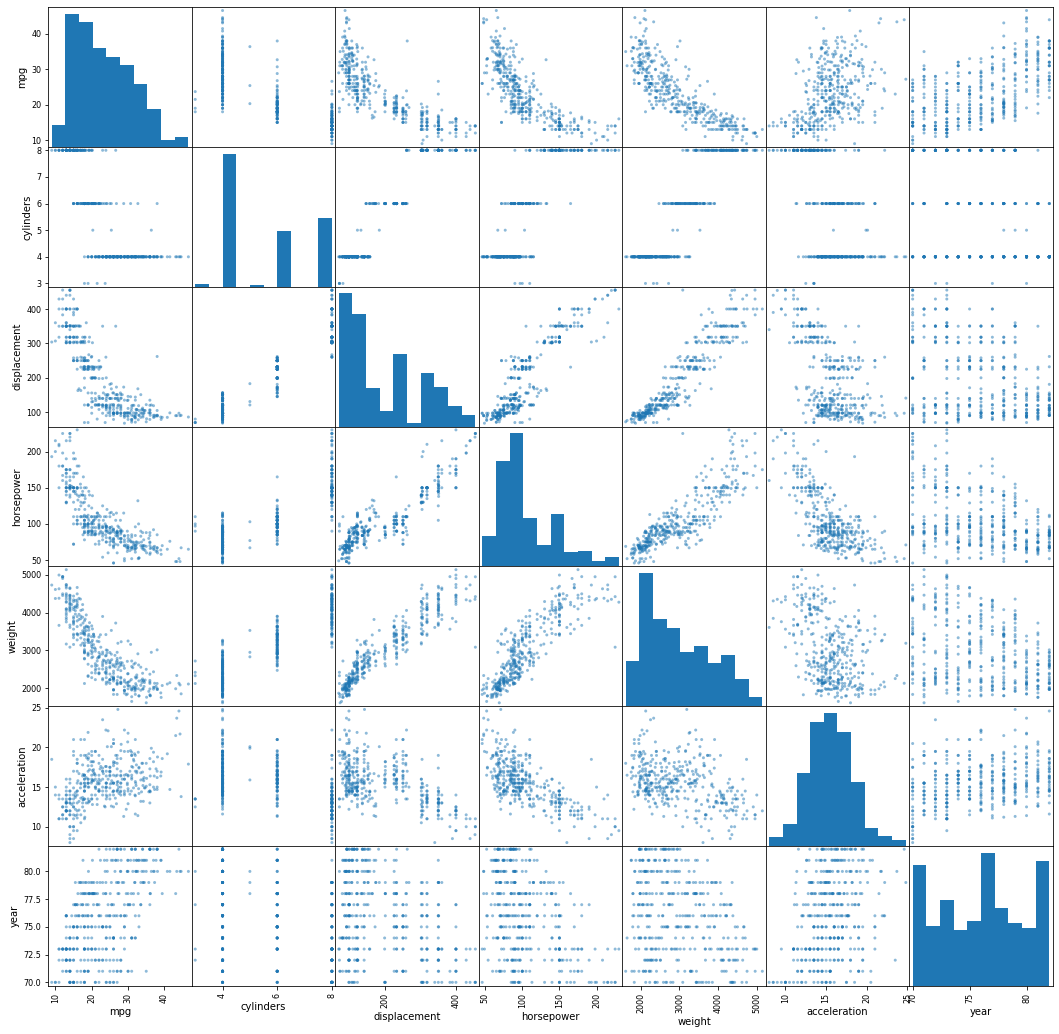

In [184]:
# построим матрицу диаграмм рассеяния для количественных признаков

pd.plotting.scatter_matrix(auto_fin.iloc[:, :-3], figsize=(18, 18))
plt.show()

Видно, что наш отклик "расход топлива" (mpg) скорее всего зависит нелинейно от "объем мотора" (displacement), "мощность мотора" (horsepower), "вес" (weight), "время разгона" (acceleration). Распределение mpg также сильно отличается от нормального. Но сначала попробуем построить обычную линейную регрессию без учета этих соображений и посмотрим, что из этого получится.

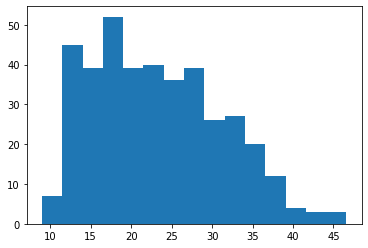

In [186]:
# сначала посмотрим внимательнее на распределение нашего отклика mpg

auto_fin['mpg'].hist(bins=15, grid=False)
plt.show()

In [159]:
# очевидных выбросов нет, будем строить регрессию, поскольку любой из столбцов America, Europe, Japan можно
# представить как линейную комбинацию двух других, то исключим один из этих столбцов из модели;
# ислючим Europe, так как автомобилей из Европы в датасете меньше всего

reg1 = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + America + Japan', data=auto_fin)
reg1_fitted = reg1.fit()
print(reg1_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          1.79e-139
Time:                        13:31:20   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -15.3246      4.602     -3.330   

Мы столкнулись с проблемой мультиколлинеарности признаков, то есть какие-то признаки в нашей выборке почти линейно зависят друг друга. Действительно, если посмотреть на датасет, то можно заметить, что такие признаки как "мощность мотора" (horsepower), "количество цилиндров" (cylinders), "объем мотора" (displacemnet), "время разгона до 60 м/ч" (acceleration) так или иначе характерезуют мощность автомобиля. Параметр "масса автомобиля" (weight) тоже может быть связан с параметрами "мощность мотора" и "объем мотора" Проверим корреляцию признаков cylinders и displacement (так как чем больше количество цилиндров, тем больше объем двигателя), а также horsepower и acceleration (так как чем больше мощность, тем быстрее должна машина разгоняться) и horsepower и displacement (чем больше объем двигателя, тем больше мощность).  
  
Если посмотреть на нашу матрицу диаграмм рассеяния, то можно увидеть, что почти между всеми перечисленными выше признаками есть некоторая взаимосвязь. Более того, видно, что и параметр "год выпуска" (year) также связан, например, с параметрами "масса автомобиля", "объем мотора", "мощность мотора". 
  
Попробуем исключить некоторые параметры из рассмотрения, чтобы решить проблему мультиколлинеарности. У нас признаков только 8, а сам датасет включает относительно немного откликов (а значит, модель обучается быстро), так что можно просто перебрать разные варианты вручную.

In [160]:
reg2 = smf.ols('mpg ~ horsepower + cylinders + America + Japan', data=auto_fin)
reg2_fitted = reg2.fit()
print(reg2_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     209.8
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           1.62e-95
Time:                        13:31:20   Log-Likelihood:                -1135.2
No. Observations:                 392   AIC:                             2280.
Df Residuals:                     387   BIC:                             2300.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.6205      0.870     46.679      0.0

Перебрав несколько разных комбинаций признаков, получили следующий набор: horsepower, cylinders, America, Japan. Добавление любого другого признака в этот набор приводит к возникновению мультиколлинеарности. Замена какого-то из признаков на другой (кроме замены одной из стран на Europe) также ведет к мультиколлинеарности.

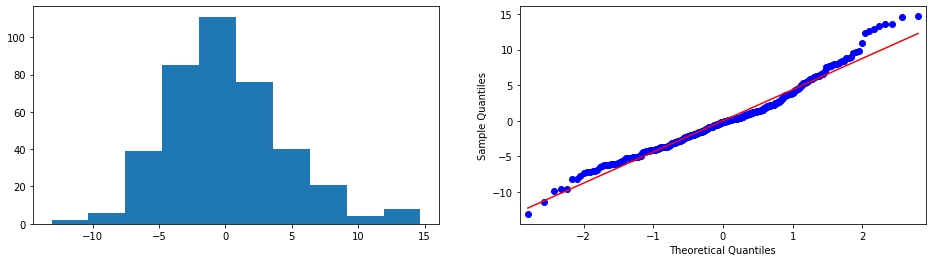

In [161]:
# как видно из summary гипотеза о том, что остатки модели имеют нормальное распределние отвергаются;
# все же оценим ситуацию визуально

fig, ax = plt.subplots(ncols=2, figsize=(16, 4))
reg2_fitted.resid.hist(ax=ax[0], grid=False)
qqplot(reg2_fitted.resid, line='r', ax=ax[1])
plt.show()

Видно, что остатки, как минимум, имеют тяжелый правый хвост. Попробуем взять логарифм от нашего отклика и построить линейную регрессию уже для него.

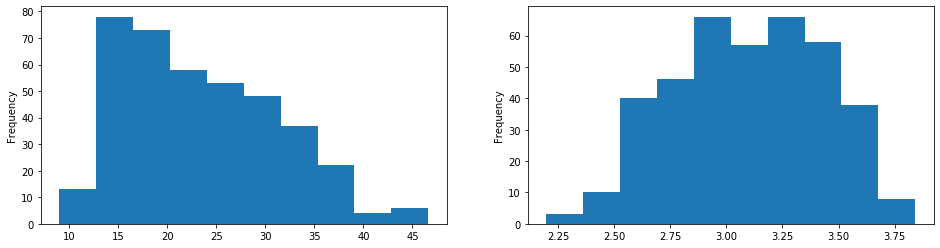

In [162]:
# посмотрим, как поменяется распределение отклика, если взять от него логарифм

fig, ax = plt.subplots(ncols=2, figsize=(16, 4))
auto_fin['mpg'].plot.hist(ax=ax[0], grid=False)
np.log(auto_fin['mpg']).plot.hist(ax=ax[1], grid=False)
plt.show()

In [163]:
reg3 = smf.ols('np.log(mpg) ~ horsepower + cylinders + America + Japan', data=auto_fin)
reg3_fitted = reg3.fit()
print(reg3_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(mpg)   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     308.6
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          6.11e-119
Time:                        13:31:26   Log-Likelihood:                 147.90
No. Observations:                 392   AIC:                            -285.8
Df Residuals:                     387   BIC:                            -266.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9215      0.033    118.936      0.0

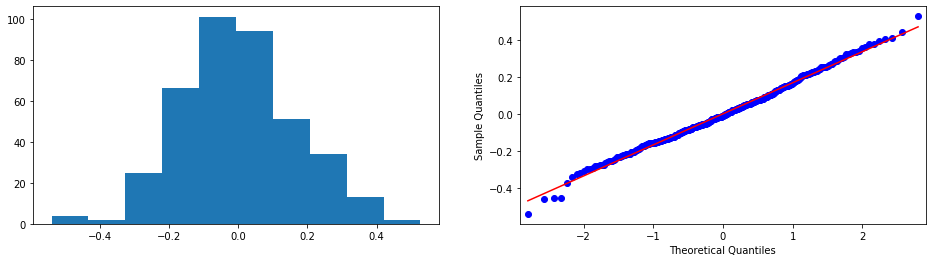

In [164]:
# опять оценим остатки модели визуально

fig, ax = plt.subplots(ncols=2, figsize=(16, 4))
reg3_fitted.resid.hist(ax=ax[0], grid=False)
qqplot(reg3_fitted.resid, line='r', ax=ax[1])
plt.show()

Кажется, что ситуация существенно улучшилась. Коэффициент детерминации вырос по сравнению с линейной регрессией reg2, а AIC и BIC заметно уменьшились. Более того, критерии Omnibus и Jarque-Bera теперь не отвергают гипотезу о том, что остатки имеют нормальное распределение. Визуальна картина с остатками тоже стала лучше. 

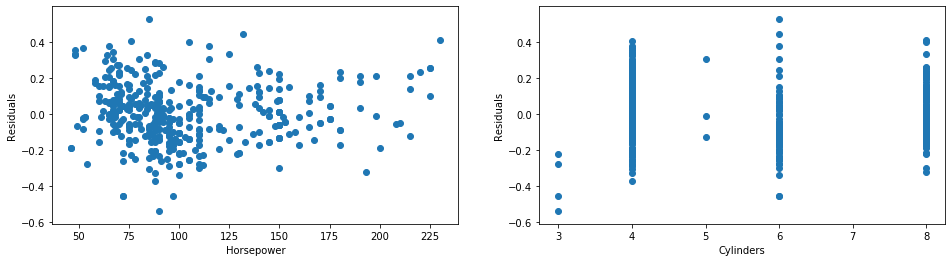

In [165]:
# посмотрим на зависимость остатков от количественных признаков:

fig, ax = plt.subplots(ncols=2, figsize=(16,4)) 

ax[0].scatter(auto_fin['horsepower'],reg3_fitted.resid)
ax[0].set_xlabel('Horsepower')
ax[0].set_ylabel('Residuals')

ax[1].scatter(auto_fin['cylinders'], reg3_fitted.resid)
ax[1].set_xlabel('Cylinders')
ax[1].set_ylabel('Residuals')

plt.show()

Кажется, что на обоих рисунках остатки распределены более-менее симметрично относительно нуля. Также кажется, что дисперсия остатков уменьшается при увеличении мощности мотора, но это может быть связано и с тем, что заметно большая часть наблюдений приходится на автомтобили с мощностью двигатетля до 125 лошадиных сил. Тем не менее, посмотрим еще и на распредление нашего отклика относительно этих двух признаков.

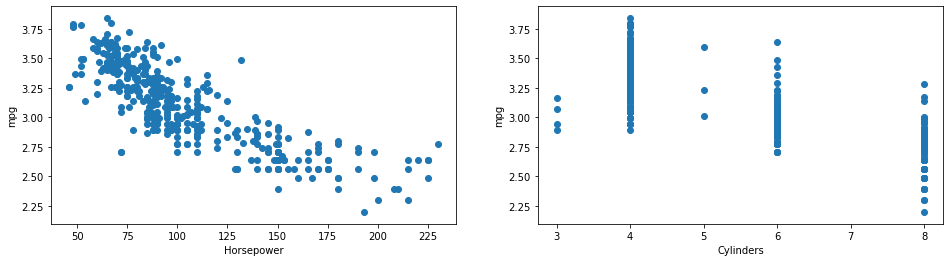

In [166]:
fig, ax = plt.subplots(ncols=2, figsize=(16,4)) 

ax[0].scatter(auto_fin['horsepower'],np.log(auto_fin['mpg']))
ax[0].set_xlabel('Horsepower')
ax[0].set_ylabel('mpg')

ax[1].scatter(auto_fin['cylinders'], np.log(auto_fin['mpg']))
ax[1].set_xlabel('Cylinders')
ax[1].set_ylabel('mpg')

plt.show()

Кажется, что зависимость mpg от horsepower не совсем линейная, скорее похожа на какую-то гиперболу. Попробуем добавить в модель соответствующий признак.

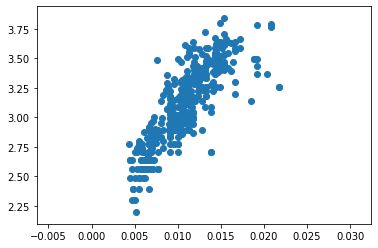

In [167]:
# сначала посмотрим на зависимость mpg от 1/horsepower

plt.scatter(1/auto_fin['horsepower'],np.log(auto_fin['mpg']))
plt.show()

Действиельно, кажется, что зависимость стала больше походить на линейную, однако попытки добавления в регрессию признака $\frac{1}{horsepower}$ (а также $\frac{1}{\sqrt{horsepower}}$ и $\frac{1}{horsepower^{2}}$) привели к возникновлению мультиколлинеарности, избавиться от которой получалось при удалении оригинального признака horsepower, поэтому было решено новых признаков не добавлять.

Из summary к регрессионной модели reg3 видно, что критерий Стьюдента не отвергает гипотезу о том, что признак America явялется незначимым для модели. (Гипотезы о незначимости всех остальных признаков критерий Стьюдента отвергает). Поробуем исключить из модели признак America и посмотреть, что получится в результате.

In [187]:
reg4 = smf.ols('np.log(mpg) ~ horsepower + cylinders + Japan', data=auto_fin)
reg4_fitted = reg4.fit()
print(reg4_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(mpg)   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     410.5
Date:                Sat, 03 Apr 2021   Prob (F-statistic):          5.67e-120
Time:                        13:58:30   Log-Likelihood:                 147.18
No. Observations:                 392   AIC:                            -286.4
Df Residuals:                     388   BIC:                            -270.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9185      0.033    119.116      0.0

Мы видим, что коэффициент детерминации почти не изменился, AIC и BIC немного уменьшились, а критерии Omnibus и Jarque-Bera по-прежнему не отвергают гипотезу о нормальном распределении остатков модели. Тогда остановимся на текущем варианте модели - reg4.

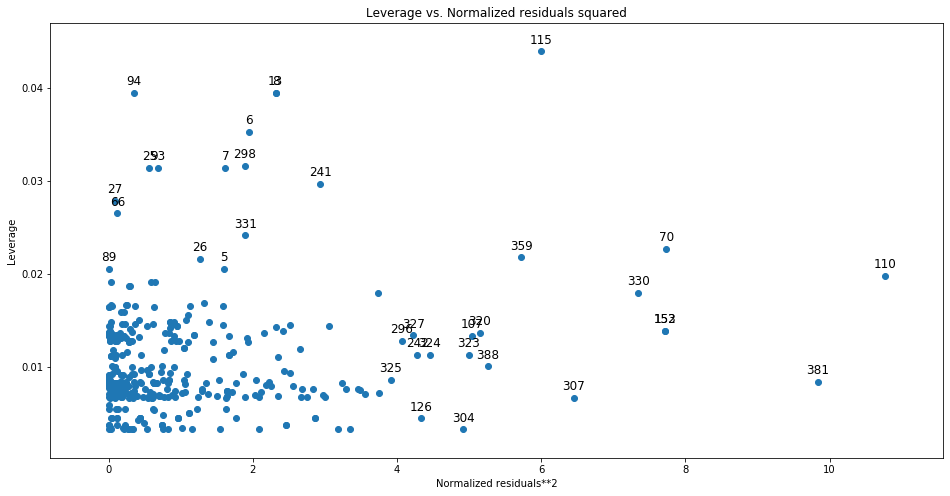

In [194]:
# выполним еще одну визуальную проверку на наличие выбросов в наших наблюдениях

plt.rc('figure', figsize=(16, 8))
plot_leverage_resid2(reg4_fitted)
plt.show()

Видно, что выделяются наблюдения 110 и 115, но они все же достаточно далеко отстоят от верхнего правого угла диаграммы (где должны находится наблюдения, на которых модель ошибается больше всего, и которые при этом обладают максимальным влияением на ее работу), так что можно считать, что явных выбросов, искажающих работу модели нет.

**Выводы по Упражнению 3.** Получившаяся у нас модель (reg4) объясняет примерно 76% вариации отклика - логарифма расхода топлива (mpg) и выглядит следующим образом:
$$
\log(\text{mpg}) \approx 3.9185 \cdot 1 -0.0041 \cdot \text{horsepower} 
-0.0750 \cdot \text{cylinders} +0.1153 \cdot \text{Japan}.
$$
Выразим зависимость mpg от использованных в модели признаков явно: 
$$
\text{mpg} \approx  e^{3.9185} \cdot e^{- 0.0041 \text{horsepower}}
\cdot e^{-0.0750 \text{cylinders}} \cdot e^{0.1153 \text{Japan}}.
$$
  
Проинтерпретируем влияение признаков на наш отклик.
На один галлон топлива машина проедет:
- на 0,4% миль меньше за каждую добавленную лошадиную силу;
- на 7,5% миль меньше за каждый добавленный цилиндр;
- на 11,5% миль больше, если была произведена в Японии.

**Упражнение 4.** В файле homes.csv содержатся данные о цене продажи 50 домов. Что можно сказать о связи признаков "цена продажи" (Sell) и "запрашиваемая цена" (List). Постройте линейную регрессию для признака Sell и без признака List.

In [13]:
homes = pd.read_csv('homes.csv')
homes.columns = ['Sell', 'List', 'Living', 'Rooms', 'Beds', 'Baths', 'Age', 'Acres', 'Taxes']
homes.head()

,Sell,List,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


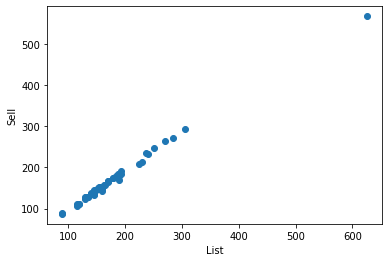

In [16]:
# построим диаграмму рассеяния для Sell и List

plt.scatter(homes['List'], homes['Sell'])
plt.xlabel('List')
plt.ylabel('Sell')
plt.show()

In [17]:
# оценим при помощи критериtd Пирсона и Спирмена линейную взаимосвязь между признаками Sell и List
print('Критерий Пирсона:\n', stats.pearsonr(homes['Sell'], homes['List']))
print('Критерий Спирмена:\n', stats.spearmanr(homes['Sell'], homes['List']))

Критерий Пирсона:
 (0.9974326270722502, 1.256595937608661e-56)
Критерий Спирмена:
 SpearmanrResult(correlation=0.9876230483174138, pvalue=2.7989356019370245e-40)


Диаграмма рассеяния показала, что между признаками Sell и List есть очевидная линейная взаимосвязь, критерии Пирсона и Спирмена также не отвергли гипотезу о наличии линейной взаимосвязи, а сами значения коэффициентов Пирсона и Спирмена очень близки по значению к 1.

In [19]:
# исключим признак List из датасета
homes.drop('List', axis='columns', inplace=True)
homes.head()

,Sell,Living,Rooms,Beds,Baths,Age,Acres,Taxes
0,142,28,10,5,3,60,0.28,3167
1,175,18,8,4,1,12,0.43,4033
2,129,13,6,3,1,41,0.33,1471
3,138,17,7,3,1,22,0.46,3204
4,232,25,8,4,3,5,2.05,3613


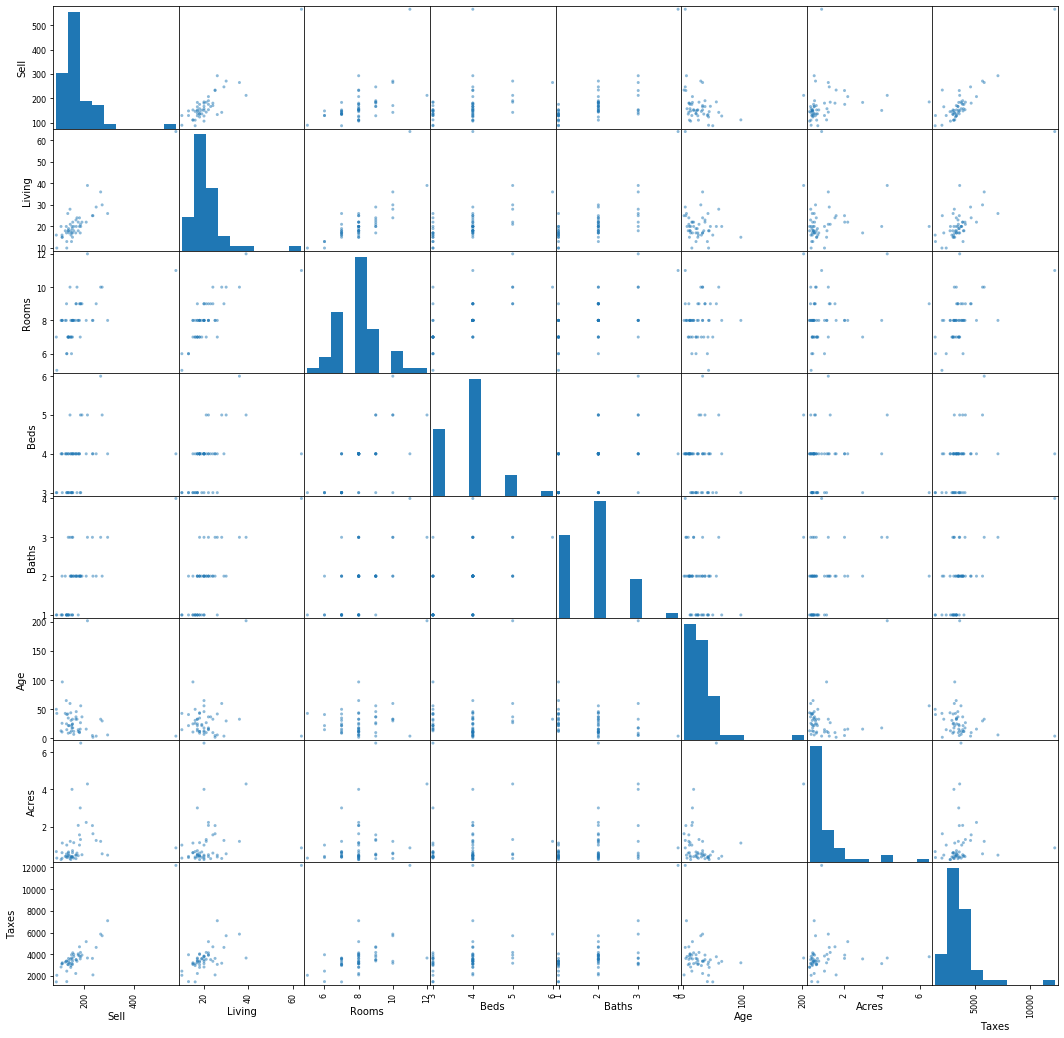

In [20]:
# бинарных признаков у нас нет, построим матрицу диаграмм рассеяния

pd.plotting.scatter_matrix(homes, figsize=(18, 18))
plt.show()

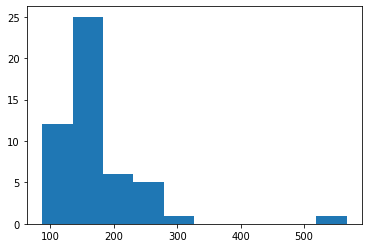

In [22]:
# видно, что среди значений отклика (Sell) присутствует выброс, посмотрим на распределение Sell внимательнее

homes['Sell'].hist(grid=False)
plt.show()

In [23]:
homes[homes['Sell'] > 400]

,Sell,Living,Rooms,Beds,Baths,Age,Acres,Taxes
28,567,64,11,4,4,4,0.85,12192


In [24]:
# удалим выброс из датасета

homes.drop(index=28, inplace=True)

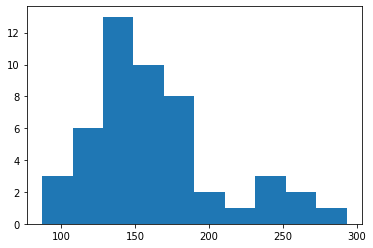

In [25]:
homes['Sell'].hist(grid=False)
plt.show()

In [40]:
# попробуем простроить линейную регрессию

reg_1 = smf.ols('Sell ~ Living + Rooms + Beds + Baths + Age + Acres + Taxes', data=homes)
reg_1_fitted = reg_1.fit()
print(reg_1_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     16.98
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           2.69e-10
Time:                        22:37:11   Log-Likelihood:                -222.63
No. Observations:                  49   AIC:                             461.3
Df Residuals:                      41   BIC:                             476.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.4841     27.778      1.025      0.3

Как и в Упражнении 3 мы столкнулись с проблемой мультиколлинеарности. Действительно, если внимательно посмотреть на признаки, то можно предположить, что признаки так или иначе связанные с площадью дома: Living, Rooms, Beds, Baths - во многих случаях могут быть связаны друг с другом. Показатель Taxes также может быть связан со многими признаками из выборки. 
  
Попробуем построить несколько моделей линейной регрессии, поочередно исключая некоторые из перечисленных признаков.

In [71]:
reg_2 = smf.ols('Sell ~ Living + Rooms + Beds + Baths + Age + Acres', data=homes)
reg_2_fitted = reg_2.fit()
print(reg_2_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   Sell   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     13.53
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           1.77e-08
Time:                        22:45:56   Log-Likelihood:                -229.60
No. Observations:                  49   AIC:                             473.2
Df Residuals:                      42   BIC:                             486.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.3263     31.390      1.317      0.1

Путем перебора различных вариантов признаков удалось определить, что признак Taxes скоррелирован с каждым из остальных признаков. А вот его удаление сразу же решает проблему мультиколлинеарности.

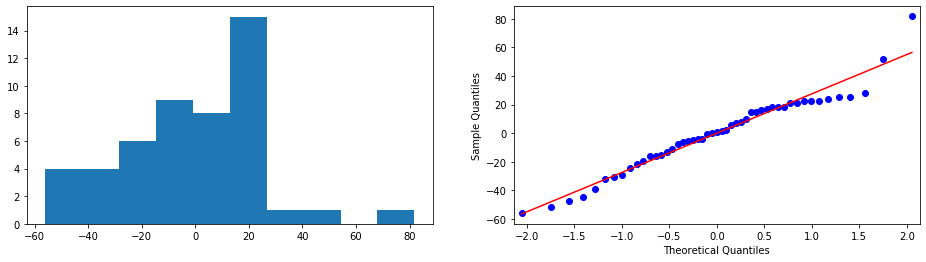

In [72]:
# посмотрим на распределение остатков модели

fig, ax = plt.subplots(ncols=2, figsize=(16, 4))
reg_2_fitted.resid.hist(ax=ax[0], grid=False)
qqplot(reg_2_fitted.resid, line='r', ax=ax[1])
plt.show()

Визуально, распределение остатков не очень похоже на нормальное. Вместе с тем, в summary критерии Omnibus и Jarque-Bera не отвергают гипотезу о нормальном распределении остатков. Но это может быть связано еще и с тем, что у нас просто относительно небольшая выборка (всего 49 наблюдений).

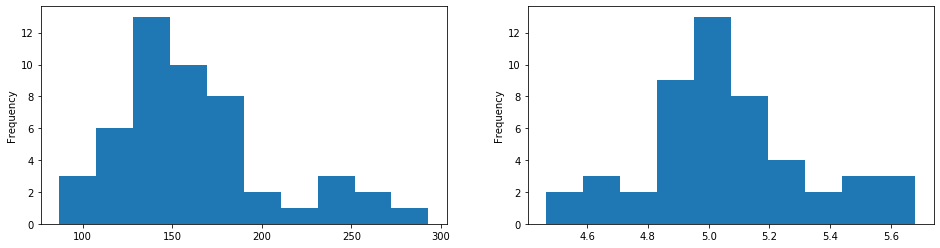

In [77]:
# рассмотрим распределение логарифма отклика Sell

fig, ax = plt.subplots(ncols=2, figsize=(16, 4))
homes['Sell'].plot.hist(ax=ax[0], grid=False)
np.log(homes['Sell']).plot.hist(ax=ax[1], grid=False)
plt.show()

In [103]:
# построим линейную регрессию для логарифма от Sell

reg_3 = smf.ols('np.log(Sell) ~ Living + Rooms + Beds + Baths + Age + Acres', data=homes)
reg_3_fitted = reg_3.fit()
print(reg_3_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(Sell)   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     13.50
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           1.82e-08
Time:                        23:55:16   Log-Likelihood:                 22.101
No. Observations:                  49   AIC:                            -30.20
Df Residuals:                      42   BIC:                            -16.96
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2823      0.184     23.213      0.0

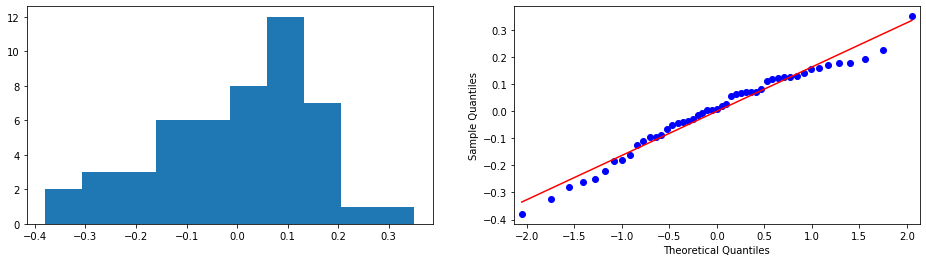

In [79]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 4))
reg_3_fitted.resid.hist(ax=ax[0], grid=False)
qqplot(reg_3_fitted.resid, line='r', ax=ax[1])
plt.show()

У модель reg_3 такой же коэффициент детерминации, как и у reg_2, при этом AIC и BIC у reg_3 существенно меньше. Критерии Onmibus и Jarque-Bera в модели reg_3 также не отвергают гипотезы о нормальном распределении остатков модели, и визуально остатки модели также лучше выглядет в модели reg_3 (более похожи на нормальное распределение). Посмотрим еще на зависимости остатоков от признаков. 

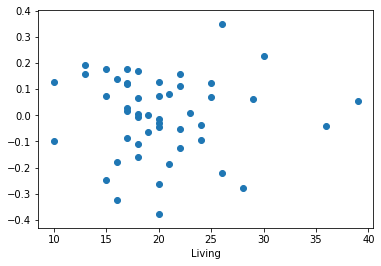

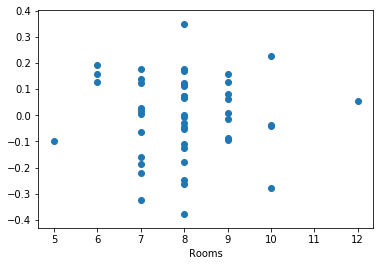

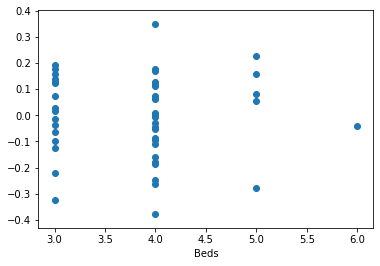

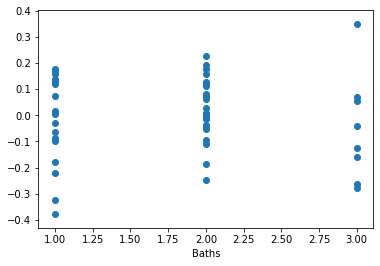

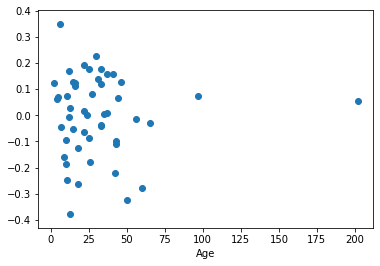

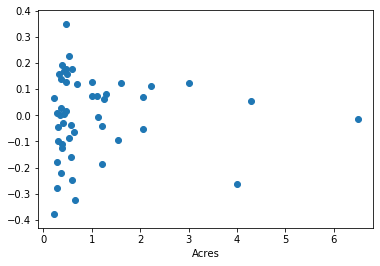

In [98]:
for col in homes.columns[1:-1]:
    plt.scatter(homes[col], reg_3_fitted.resid)
    plt.xlabel(col)
    plt.show()

В нашей выборке слишком мало наблюдений, поэтому по представленным выше графикам сложно делать однозначные выводы. Но в целом, кажется, что все более-менее хорошо: остатки распределны симметрично относительно нуля и их дисперсия не зависит от значений признаков.

Вернемся к summary модели reg_3. Видно, что критерий Стьюдента не отвергает гипотезу о незначимости нескольких признаков: Rooms, Beds, Baths. Спорный результат критерий Стьюдента показывает в отношении Acres. Исключим Rooms, Beds, Baths из нашей модели и оценим результат.

In [102]:
reg_4 = smf.ols('np.log(Sell) ~ Living + Age + Acres', data=homes)
reg_4_fitted = reg_4.fit()
print(reg_4_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(Sell)   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     27.96
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           2.31e-10
Time:                        23:55:07   Log-Likelihood:                 21.555
No. Observations:                  49   AIC:                            -35.11
Df Residuals:                      45   BIC:                            -27.54
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3792      0.087     50.224      0.0

По сравнению с модель reg_3 коэффициент детерминации незначительно уменьшился. Но зато также уменьшились и значения критериев AIC и BIC. Критерии Omnibus b Jarque-Bera по-прежнему не отвергают гипотезу о нормальном распределении остатков.

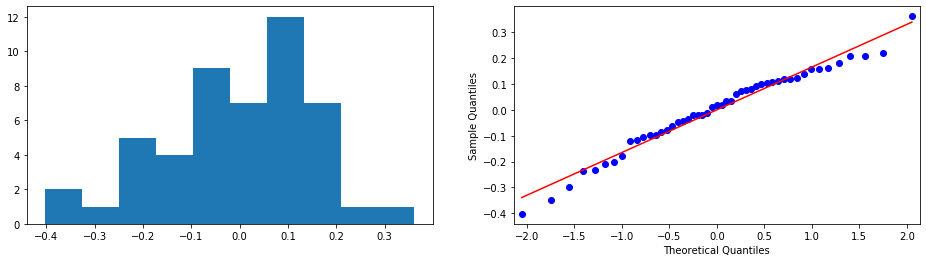

In [104]:
# оценим распределение остатков визуально

fig, ax = plt.subplots(ncols=2, figsize=(16, 4))
reg_4_fitted.resid.hist(ax=ax[0], grid=False)
qqplot(reg_4_fitted.resid, line='r', ax=ax[1])
plt.show()

Визуально картина по остатком не слишком изменилась.

In [105]:
# проверим гипотезу о незначимости признаков Rooms, Beds и Baths при помощи критерия Фишера

print("F=%f, pvalue=%f, k1=%f" % reg_3_fitted.compare_f_test(reg_4_fitted))

F=0.315582, pvalue=0.814013, k1=3.000000


Видим, что критерий Фишера не отвергает гипотезу о незначимости перечисленных выше признаков.

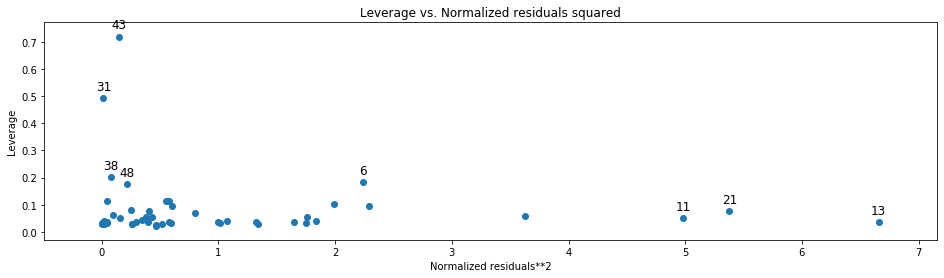

In [108]:
# выполним еще одну визуальную проверку на наличие выбросов в наших наблюдениях

plt.rc('figure', figsize=(16, 4))
plot_leverage_resid2(reg_4_fitted)
plt.show()

Видим, что явных выбросов нет. Тогда остановимся на модели reg_4.

**Выводы по Упражнению 4.** Получившаяся у нас модель (reg_4) объясняет примерно 65% вариации отклика - логарифма цены (Sell) и выглядит следующим образом:
$$
\log(\text{Sell}) \approx 4.3792 \cdot 1 +0.0360 \cdot \text{Living} 
-0.0035 \cdot \text{Age} +0.0518 \cdot \text{Acres}.
$$
Выразим зависимость Sell от использованных в модели признаков явно: 
$$
\text{Sell} \approx  e^{4.3792} \cdot e^{0.0360 \text{Living}}
\cdot e^{-0.0035 \text{Age}} \cdot e^{0.0518 \text{Acres}}.
$$
  
Проинтерпретируем влияение признаков на наш отклик.
Цена продажи жилья:
- увеличивается на 3,6% при увеличении жилой площади (Living) на 1 ед.;
- уменьшается на 0,4% при увеличении возраста жилья (Age) на 1 ед.;
- увеличивается на 5,2% при увеличении площади жилого помещения (Acres) на 1 ед.